# Problem 1

Implement adaptive thresholding from scratch. Your function should take an image as input
and output a thresholded binary image at the output. Please, use template shown below.
Also, your solution should contain a convenient user interface to adjust the parameters of
the function (sliders, buttons, checkboxes etc), similar to what we have in our labs

In [4]:
def  adaptivethresholding(image , thresholdingtype = "mean" , blocksize = 3 ):
    """
    Function calculates adaptive thresholding for a given image
    Input:
    image: grayscale or color image
    thresholding_type: type of thresholding;
    possible values: ’mean’ and ’gaussian’
    block_size: kernel size in which the threshold value is
    calculated for the current pixel
    Output:
    image_bw: binary thresholded image
    """
    blocks = [image[x:x+blocksize,y:y+blocksize] for x in range(0,image.shape[0],blocksize) for y in range(0,image.shape[1],blocksize)]

    if thresholdingtype == "mean":
  
        for block in blocks:
            thresh = np.mean(block)
            block[block <= thresh] = 0
            block[block > thresh] = 1

    if thresholdingtype == "gaussian":
        for block in blocks:         
            x  = np.linspace(-1,1,block.size)
            gaus = 1/ np.sqrt(2*np.pi)*np.exp(-x ** 2/2)
            gaus /= np.sum(gaus)
            thresh = np.dot(block.flatten(), gaus)
            block[block <= thresh] = 0
            block[block > thresh] = 1
          
    i = 0
    output_image = np.zeros(img_gray.shape)
    for x in range(0,img_gray.shape[0],blocksize):
        for y in range(0,img_gray.shape[1],blocksize):
            output_image[x:x+blocksize,y:y+blocksize] = blocks[i]
            i+=1

    return output_image


--2021-09-06 18:13:05--  https://thumbs.dreamstime.com/b/cosmos-beauty-deep-space-elements-image-furnished-nasa-science-fiction-art-102581846.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38403 (38K) [image/jpeg]
Saving to: ‘mk.jpeg’

mk.jpeg             100%[===================>]  37.50K  --.-KB/s    in 0s      

2021-09-06 18:13:05 (190 MB/s) - ‘mk.jpeg’ saved [38403/38403]



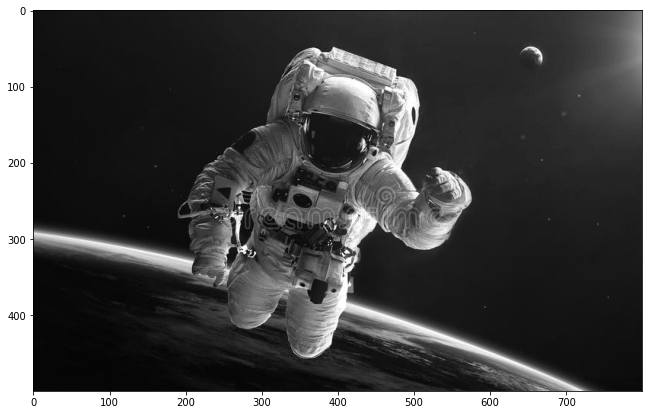

(500, 800)


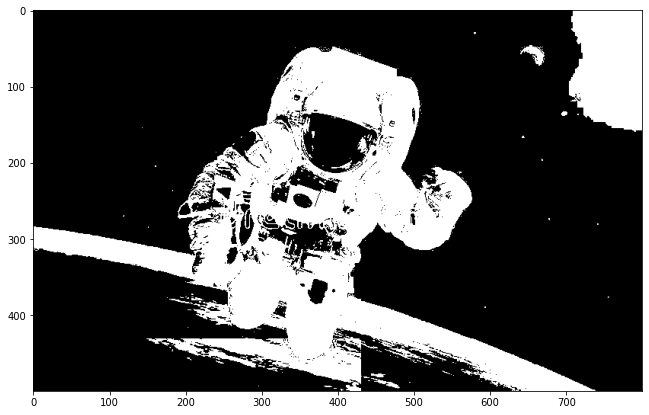

In [5]:

from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)
import numpy as np
import cv2

!wget https://thumbs.dreamstime.com/b/cosmos-beauty-deep-space-elements-image-furnished-nasa-science-fiction-art-102581846.jpg -O mk.jpeg
img_gray = cv2.imread('mk.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

#@title Adaptive Thresholding { run: "auto" }
block_size = 431 #@param {type:"slider", min:0, max:1000, step:1}
thresholding_type = 'gaussian' #@param ["mean", "gaussian"]

out = adaptivethresholding(img_gray, thresholding_type, block_size)
print(out.shape)
plt.imshow(out, cmap = 'gray')
plt.show()

Calculate an object size by photo and order objects according certain size (e.g. area, or
perimeter). If two objects have the same size (two identical objects), then sort them from
left to right. Show rank, and size values (area, perimeter, height, width) in selected units.
Please, use template shown below. Also, your solution should contain a convenient user
interface to adjust the parameters of the function (sliders, buttons, checkboxes etc).

In [237]:
# http://www.learningaboutelectronics.com/Articles/How-to-label-objects-in-an-image-Python-OpenCV.php

from google.colab.patches import cv2_imshow

def calculate_sizes_and_rank(image, units = "m", rank_by = "area"):
  orig_image = image.copy()
  gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  edges= cv2.Canny(gray, 50,100)

  kernel = np.ones((4,4), np.uint8)
  edges = cv2.dilate(edges, kernel, iterations = 4)
  kernel = np.ones((7,7), np.uint8)
  edges = cv2.erode(edges, kernel, iterations = 1)


  contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  norm_contours = []
  for c in contours:
    box = cv2.minAreaRect(c)
    box = np.array(cv2.boxPoints(box))
    if 0 in box or cv2.contourArea(c) < 100:
      continue
    cv2.drawContours(image, [box.astype('int')], -1, (255, 255, 0), 4)
    norm_contours.append(c)

  image_copy = image.copy()       
  # see the results
  cv2_imshow(image_copy)
  cv2.waitKey(0)
  cv2.imwrite('contours_none_image1.jpg', image_copy)
  cv2.destroyAllWindows()

  if rank_by == "area":
    sorted_contours= sorted(norm_contours, key=lambda c: cv2.contourArea(c), reverse= True)
  if rank_by == "perimeter":
    sorted_contours= sorted(norm_contours, key=lambda c: cv2.arcLength(c, True), reverse= True)
  if rank_by == "width":
    sorted_contours= sorted(norm_contours, key=lambda c: cv2.boundingRect(c)[2], reverse= True)
  if rank_by == "height":
    sorted_contours= sorted(norm_contours, key=lambda c: cv2.boundingRect(c)[3], reverse= True)

  cv2.drawContours(orig_image, sorted_contours, -1, (255,0,0),1)
  cv2.waitKey(0)
  cv2_imshow(orig_image)

  
  areas = [cv2.contourArea(c) for c in sorted_contours]
  perimeters = [cv2.arcLength(c, True) for c in sorted_contours]
  widths = [cv2.boundingRect(c)[2] for c in sorted_contours]
  heights = [cv2.boundingRect(c)[3] for c in sorted_contours]

  sizes = (heights, widths, perimeters, areas)
  return orig_image, sizes
  

--2021-09-06 20:33:37--  https://i.imgur.com/dBDZCQo.png
Resolving i.imgur.com (i.imgur.com)... 199.232.64.193
Connecting to i.imgur.com (i.imgur.com)|199.232.64.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576045 (563K) [image/png]
Saving to: ‘coins.png’

coins.png           100%[===================>] 562.54K  --.-KB/s    in 0.05s   

2021-09-06 20:33:37 (11.2 MB/s) - ‘coins.png’ saved [576045/576045]

--2021-09-06 20:33:37--  https://i.imgur.com/1eIo7wH.png
Resolving i.imgur.com (i.imgur.com)... 199.232.64.193
Connecting to i.imgur.com (i.imgur.com)|199.232.64.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445970 (436K) [image/png]
Saving to: ‘objects.png’

objects.png         100%[===================>] 435.52K  --.-KB/s    in 0.04s   

2021-09-06 20:33:37 (10.2 MB/s) - ‘objects.png’ saved [445970/445970]



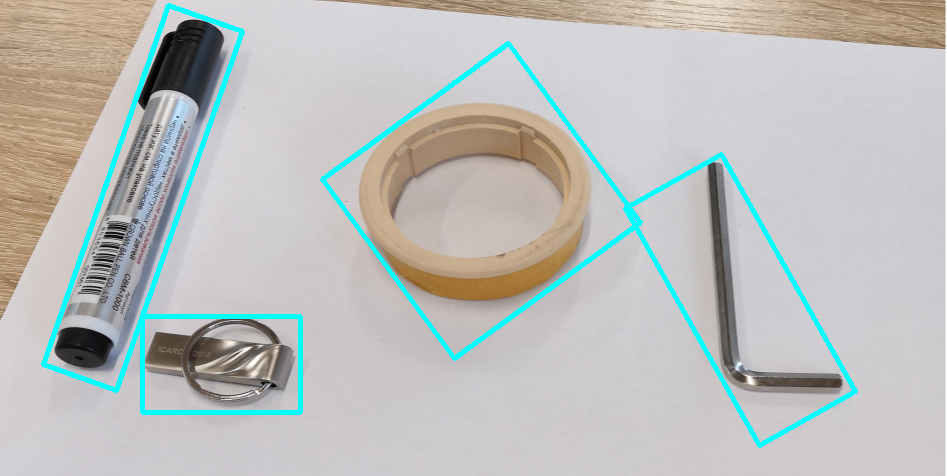

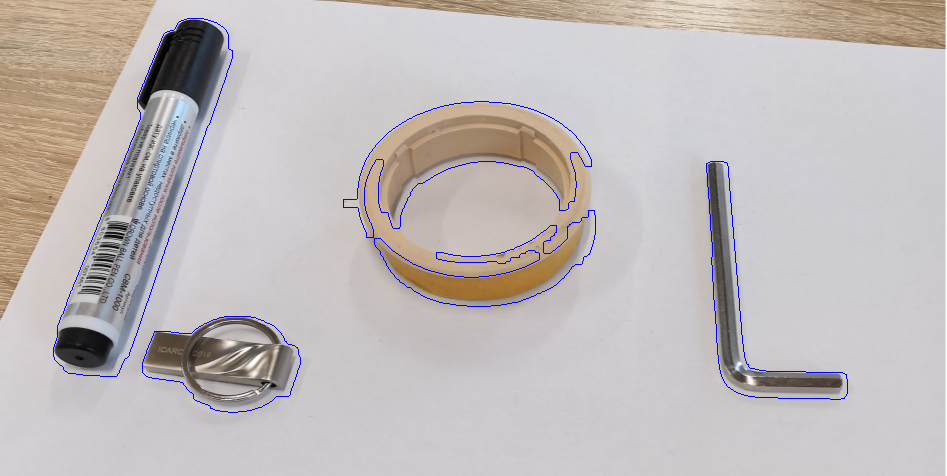

In [242]:
!wget https://i.imgur.com/1eIo7wH.png -O 'objects.png'

img= cv2.imread('objects.png')

#@title  Thresholding { run: "auto" }
rank_type = 'perimeter' #@param ["area", "perimeter", "width", "height"]

res_img, sizes = calculate_sizes_and_rank(img, rank_by=rank_type)  

First eliminate all coins touching the boundary of the paper. Next, extract the remaining
coins, and count total value of coins.

In [273]:
!wget https://i.imgur.com/dBDZCQo.png -O 'coins.png'
img= cv2.imread('coins.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

th3 = cv2.threshold(gray,180,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)


edges = cv2.dilate(th3, None, iterations = 3)

output = cv2.connectedComponentsWithStats(edges, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

res_labels = []
print(numLabels)
for i in range(1, numLabels):
  area = stats[i, cv2.CC_STAT_AREA]
  if area>100:
    res_labels.append(i)
print(len(res_labels))
cv2_imshow(labels)
cv2.waitKey(0)

--2021-09-06 20:57:14--  https://i.imgur.com/dBDZCQo.png
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576045 (563K) [image/png]
Saving to: ‘coins.png’

coins.png           100%[===================>] 562.54K  --.-KB/s    in 0.05s   

2021-09-06 20:57:15 (11.0 MB/s) - ‘coins.png’ saved [576045/576045]



TypeError: ignored